 # Install libraries and develop a color dictionary

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


colors = ["#89CFF0", "#FF69B4", "#FFD700", "#7B68EE", "#FF4500",
          "#9370DB", "#32CD32", "#8A2BE2", "#FF6347", "#20B2AA",
          "#FF69B4", "#00CED1", "#FF7F50", "#7FFF00", "#DA70D6"]

 # Read and view the data

In [31]:
data = pd.read_csv(r"C:\Users\user\Desktop\DA\shopping_trends.csv")
data.sample(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
2605,2606,41,Male,Hoodie,Clothing,93,Nevada,M,White,Spring,3.7,No,Debit Card,2-Day Shipping,No,No,32,Venmo,Fortnightly
3112,3113,19,Female,Blouse,Clothing,97,Texas,S,Green,Fall,3.8,No,Cash,Express,No,No,26,Venmo,Annually
3563,3564,43,Female,Blouse,Clothing,90,Maine,M,Green,Summer,4.9,No,Credit Card,Standard,No,No,8,Credit Card,Every 3 Months
1662,1663,63,Male,Sunglasses,Accessories,24,New Mexico,M,Olive,Winter,4.6,No,Debit Card,Free Shipping,Yes,Yes,46,Debit Card,Fortnightly
225,226,25,Male,Jacket,Outerwear,22,Arkansas,M,Olive,Spring,3.2,Yes,Debit Card,Next Day Air,Yes,Yes,11,Bank Transfer,Annually


 # View the number of rows and columns

In [33]:
data.shape

(3900, 19)

# Column names

In [35]:
data.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases'],
      dtype='object')

# Information about data within data

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

# View a description of mean, standard deviation, highest value, and lowest value data

In [39]:
data.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


# Display if there is blank data

In [41]:
data.isnull().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

 # View data redundancy if any duplicated data.
 

In [43]:
data.duplicated().sum()

0

# Add a column to divide age groups and merge them into the last column in the data

In [45]:
bins = [13, 19, 29, 44, 59, 100]  # Rentang umur
labels = ['Teenagers (13-19) ', 'Young Adults (20-29)', 'Adults (30-44)', 'Middle Age (45-59)', 'Senior Citizens (60-100)']
data['Age Group'] = pd.cut(data['Age'], bins=bins, labels=labels)
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases,Age Group
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly,Middle Age (45-59)
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly,Teenagers (13-19)
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly,Middle Age (45-59)
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly,Young Adults (20-29)
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually,Middle Age (45-59)


Add a column for total purchases by type of purchases

In [47]:
purchases_count = data['Category'].value_counts().reset_index()
purchases_count.columns = ['Category', 'purchases Count']
df = data.merge(purchases_count, on='Category', how='left')
df.head(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases,Age Group,purchases Count
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,...,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly,Middle Age (45-59),1737
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,...,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly,Teenagers (13-19),1737
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,...,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly,Middle Age (45-59),1737
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,...,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly,Young Adults (20-29),599
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,...,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually,Middle Age (45-59),1737


 # Gender analysis

In [49]:
data["Gender"].describe()


count     3900
unique       2
top       Male
freq      2652
Name: Gender, dtype: object

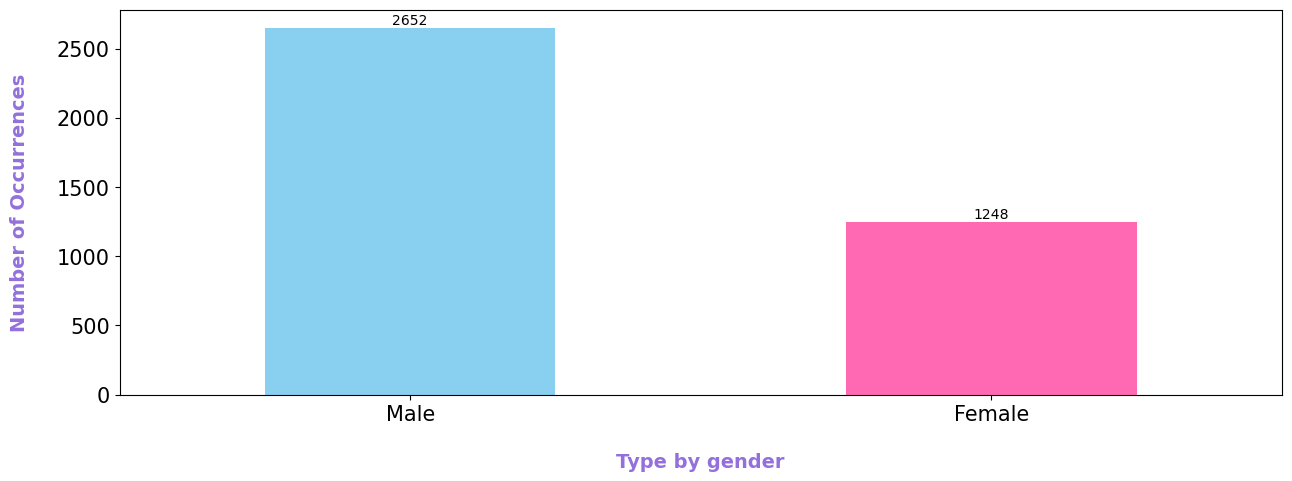

In [50]:
plt.figure(figsize=(15,5))
ax= data["Gender"].value_counts().plot(kind="bar",color=colors,rot=0)
ax.set_xticklabels(("Male","Female"))

for p in ax.patches:
    ax.annotate(int(p.get_height()),(p.get_x()+0.25,p.get_height()+1),ha="center",va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Type by gender', weight = "bold", color = "#9370DB", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#9370DB", fontsize = 14, labelpad = 20);

 # Create a pie chart to display the number of females and males

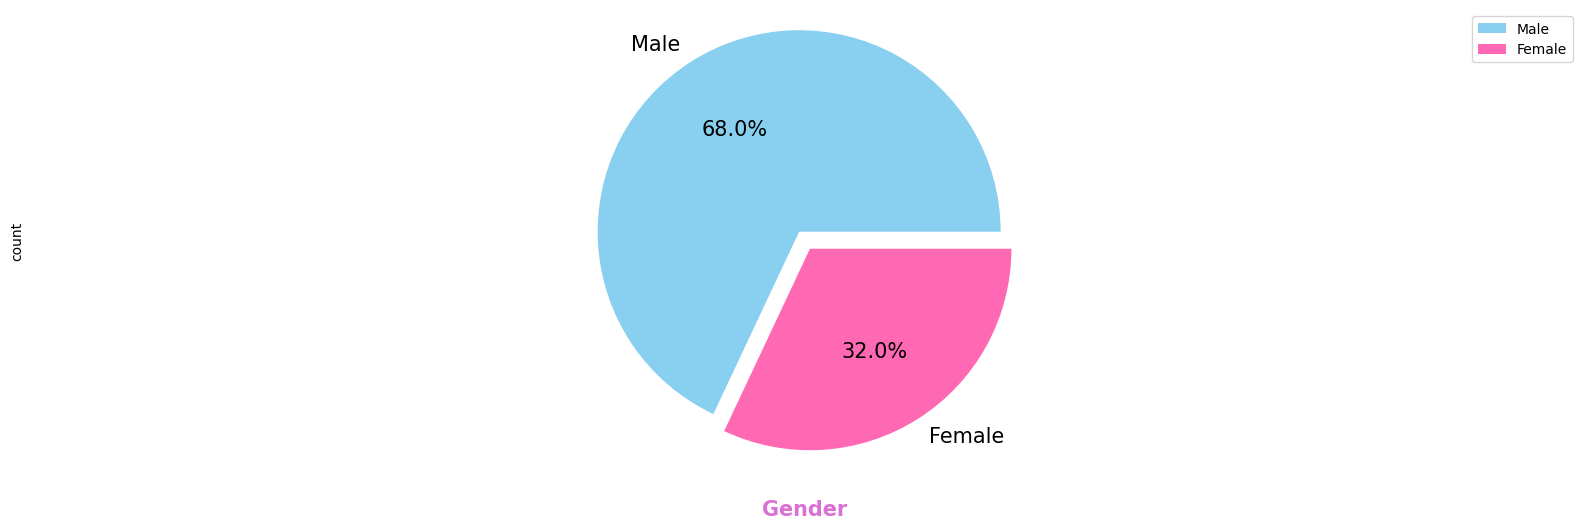

In [52]:
plt.figure(figsize = (20, 6))

counts = data["Gender"].value_counts()
explode = (0, 0.1)

counts.plot(kind = 'pie', fontsize = 15, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Gender', weight = "bold", color = "#DA70D6", fontsize = 15, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

## **Age Analysis**

In [54]:
data["Age"].describe()


count    3900.000000
mean       44.068462
std        15.207589
min        18.000000
25%        31.000000
50%        44.000000
75%        57.000000
max        70.000000
Name: Age, dtype: float64

# **The number of females and males in each age group**

C:\Users\user\AppData\Local\Temp\ipykernel_5500\3084840087.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_count = df.groupby(['Age Group', 'Gender']).size().unstack(fill_value=0)


<Figure size 2000x1000 with 0 Axes>

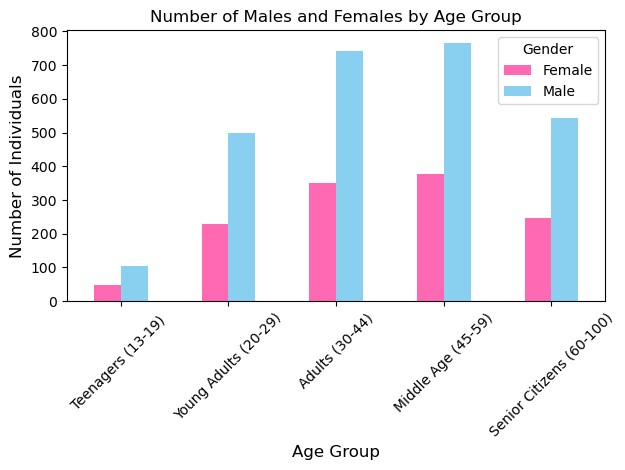

In [179]:
gender_count = df.groupby(['Age Group', 'Gender']).size().unstack(fill_value=0)

plt.figure(figsize=(20,10))
gender_count.plot(kind='bar', stacked=False, color=['#FF69B4', '#89CFF0'])
plt.title('Number of Males and Females by Age Group', fontsize=12)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Number of Individuals', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

# **Distribution of Purchase item**





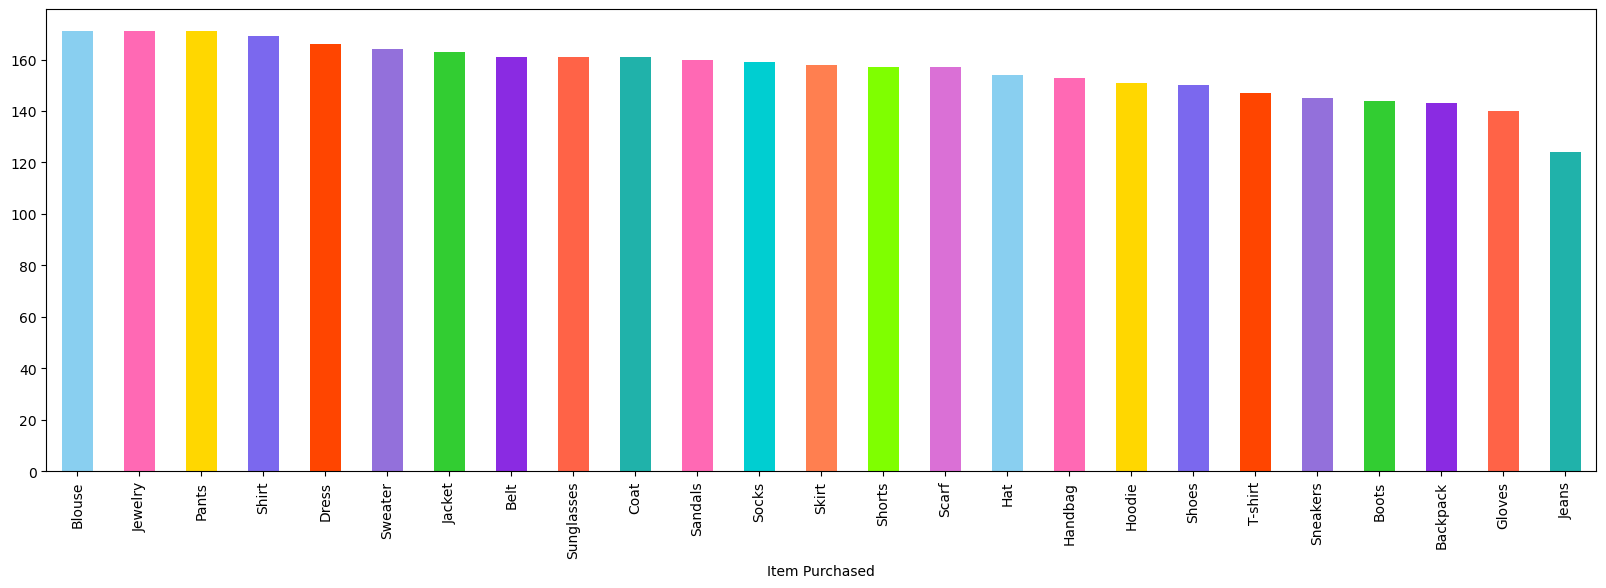

In [136]:
plt.figure(figsize = (20, 6))
ax = df["Item Purchased"].value_counts().plot(kind = 'bar', color = colors, rot = 90)

### **The most commonly purchased items in each category**

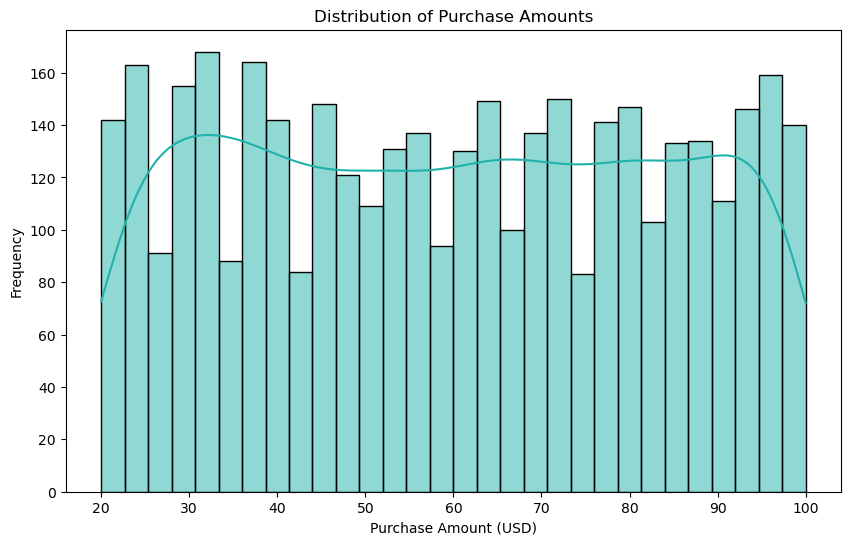

In [60]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Purchase Amount (USD)'], bins=30, kde=True, color='#20B2AA')
plt.title('Distribution of Purchase Amounts')
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Frequency')
plt.show()

# Number of repetitions by type of purchase

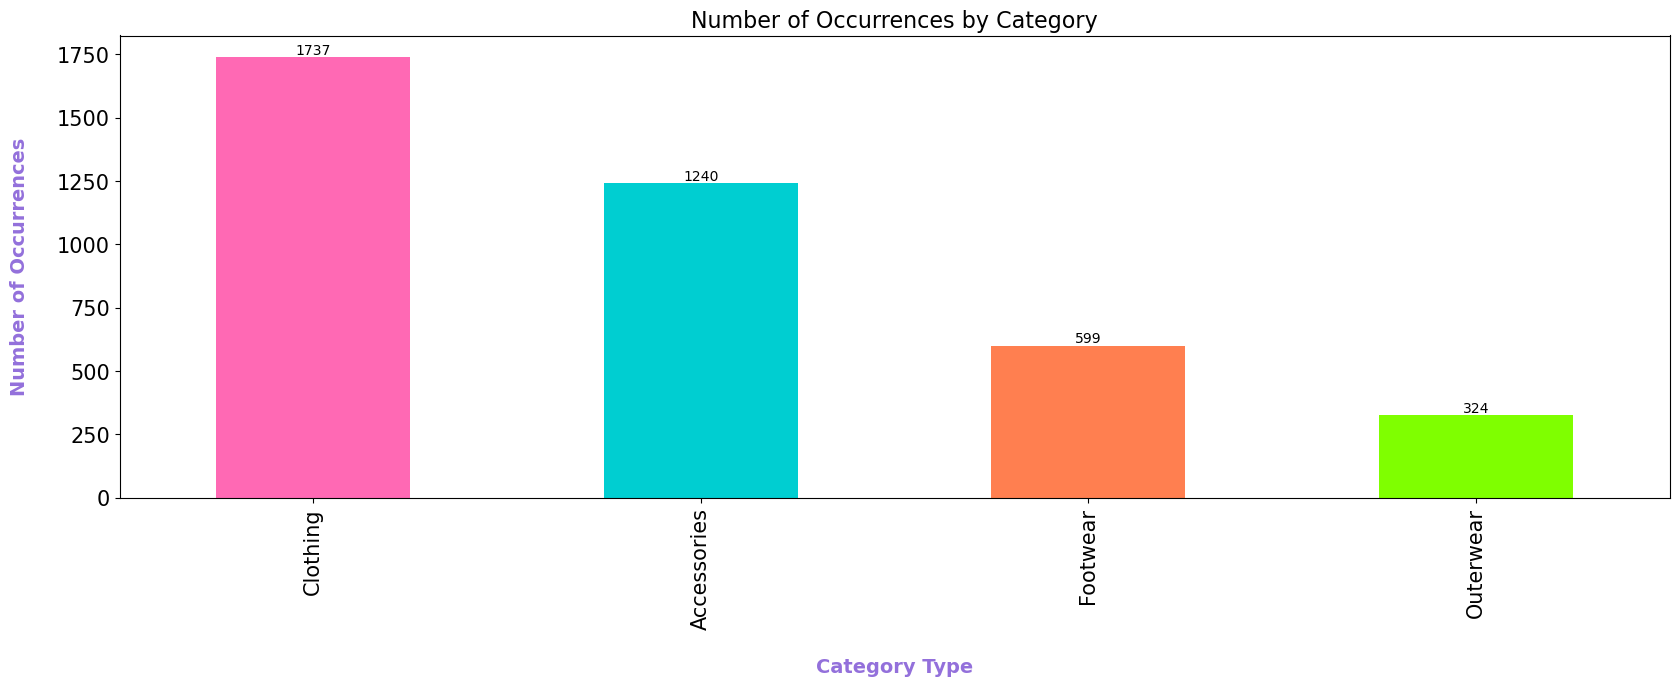

In [64]:
plt.figure(figsize = (20, 6))
ax = df["Category"].value_counts().plot(kind = 'bar', color =["#FF69B4", "#00CED1", "#FF7F50", "#7FFF00", "#DA70D6"] , rot = 90)
ax.set_xticklabels(('Clothing', 'Accessories', 'Footwear', 'Outerwear'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.title('Number of Occurrences by Category', fontsize=16)
plt.xlabel('Category Type', weight = "bold", color = "#9370DB", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#9370DB", fontsize = 14, labelpad = 20);

# Number of repetitions according to the type of purchases in a circle

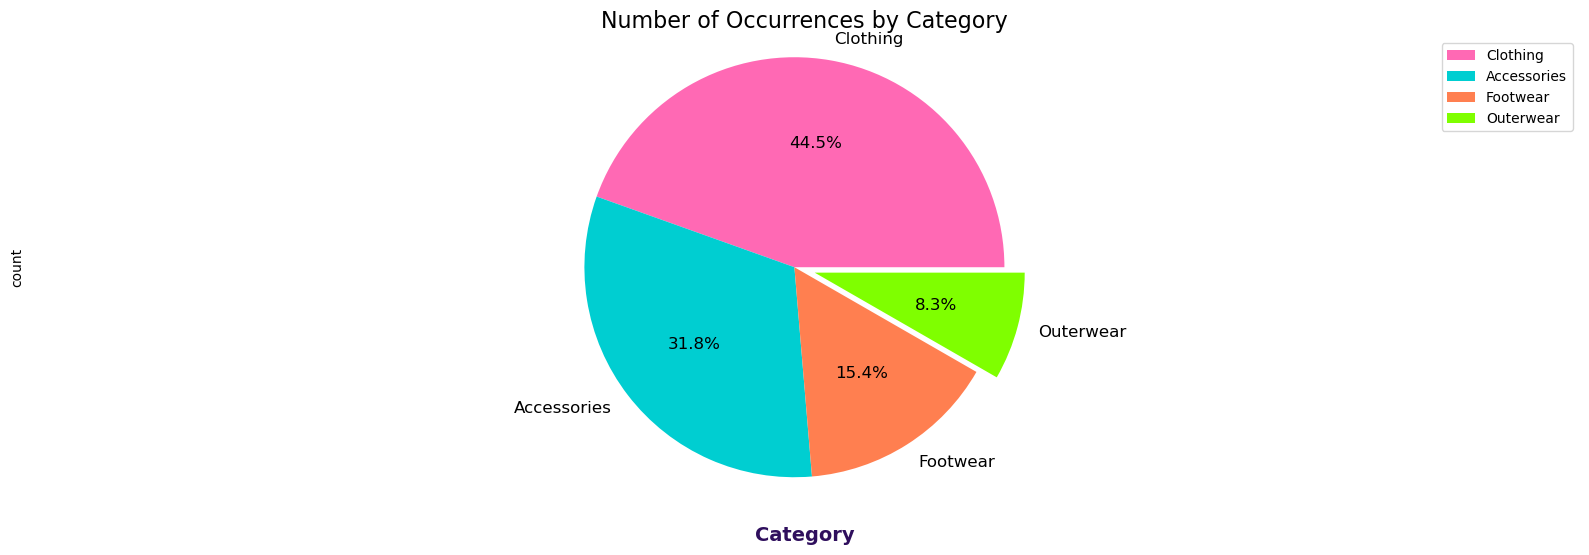

In [193]:
plt.figure(figsize = (20, 6))

counts = df["Category"].value_counts()
explode = (0, 0.0, 0.0, 0.1)

counts.plot(kind = 'pie', fontsize = 12, colors = ["#FF69B4", "#00CED1", "#FF7F50", "#7FFF00", "#DA70D6"], explode = explode, autopct = '%1.1f%%')
plt.xlabel('Category', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.title('Number of Occurrences by Category', fontsize=16)
plt.legend(labels = counts.index, loc = "best")
plt.show()

# Number of repetitions depending on size

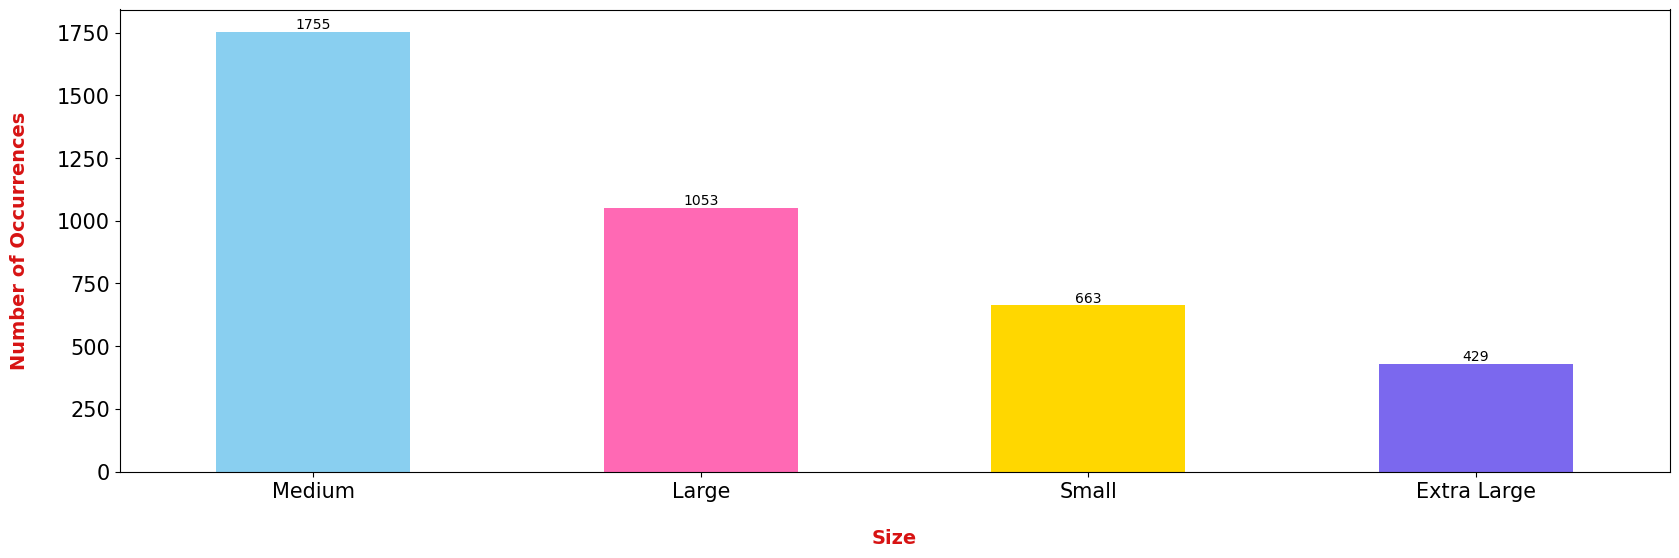

In [68]:
plt.figure(figsize = (20, 6))
ax = df["Size"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('Medium', 'Large', 'Small', 'Extra Large'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Size', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);

# Display data by size link with gender

<Figure size 2000x1000 with 0 Axes>

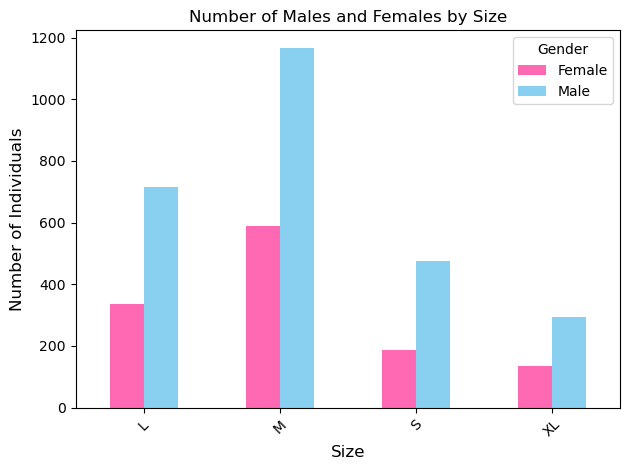

In [140]:
group_data1 = df.groupby(['Size', 'Gender']).size().unstack(fill_value=0)
plt.figure(figsize=(20,10))
group_data1.plot(kind='bar', stacked=False, color=['#FF69B4', '#89CFF0'])
plt.title('Number of Males and Females by Size', fontsize=12)
plt.xlabel('Size', fontsize=12)
plt.ylabel('Number of Individuals', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


# Drawing to link age group to size

C:\Users\user\AppData\Local\Temp\ipykernel_5500\1833154380.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_data1 = df.groupby(['Age Group', 'Size']).size().reset_index(name='Count')


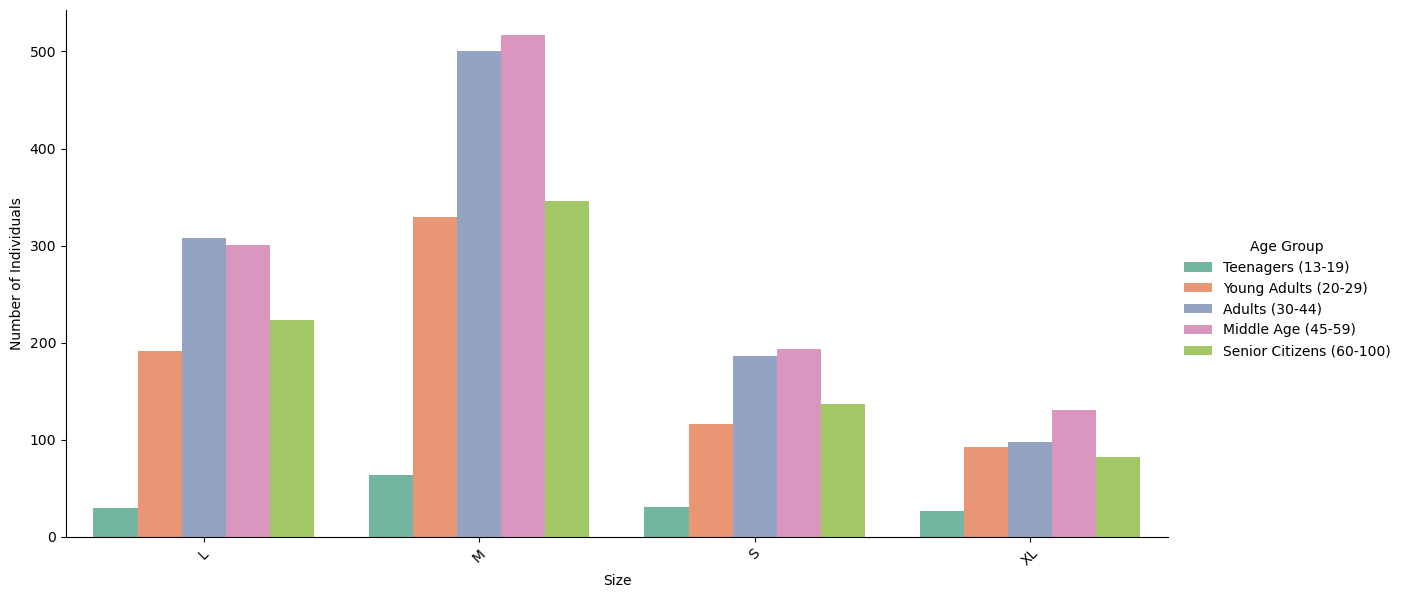

In [72]:

# Grouping the data and counting occurrences
group_data1 = df.groupby(['Age Group', 'Size']).size().reset_index(name='Count')

# Creating a Facet Grid using Seaborn
g = sns.catplot(data=group_data1, x='Size', y='Count', hue='Age Group', kind='bar', height=6, aspect=2, palette='Set2')

# Customizing titles and labels
g.set_axis_labels("Size", "Number of Individuals")
g.set_titles("Number of Size by Age Group")
plt.xticks(rotation=45)
plt.show()


 # View data by type of procurement and gender

<Figure size 2000x1000 with 0 Axes>

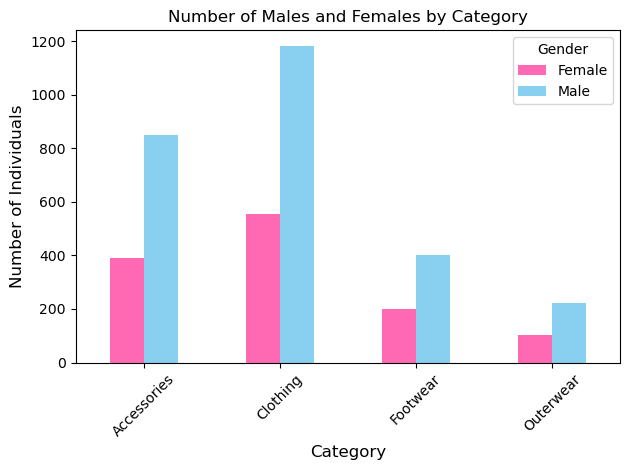

In [142]:
group_data = df.groupby(['Category', 'Gender']).size().unstack(fill_value=0)
plt.figure(figsize=(20,10))
group_data.plot(kind='bar', stacked=False, color=['#FF69B4', '#89CFF0'])
plt.title('Number of Males and Females by Category', fontsize=12)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Number of Individuals', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


## **Aggregate sales data by category**


C:\Users\user\AppData\Local\Temp\ipykernel_5500\2930820473.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_sales_sorted, x='Category', y='Total Sales (USD)', palette= colors, order=category_sales_sorted['Category'])
C:\Users\user\AppData\Local\Temp\ipykernel_5500\2930820473.py:12: UserWarning: The palette list has more values (15) than needed (4), which may not be intended.
  sns.barplot(data=category_sales_sorted, x='Category', y='Total Sales (USD)', palette= colors, order=category_sales_sorted['Category'])


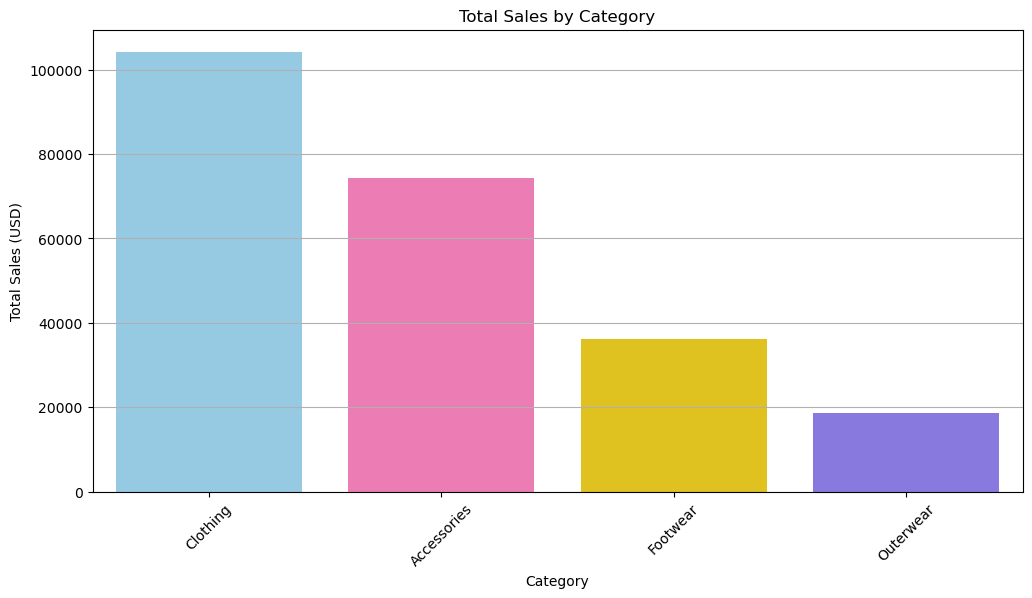

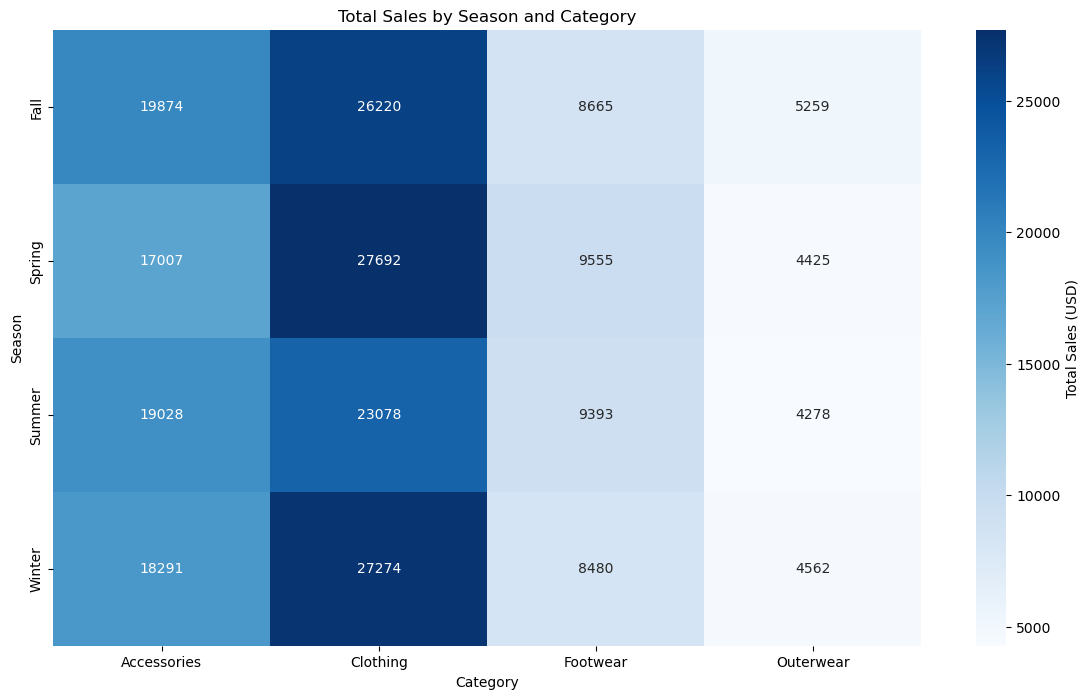

Category Sales Summary:
      Category  Total Sales (USD)  Average Purchase (USD)  Number of Purchases
1     Clothing             104264               60.025331                 1737
0  Accessories              74200               59.838710                 1240
2     Footwear              36093               60.255426                  599
3    Outerwear              18524               57.172840                  324


In [144]:
category_sales = data.groupby('Category')['Purchase Amount (USD)'].agg(['sum', 'mean', 'count']).reset_index()
category_sales.rename(columns={'sum': 'Total Sales (USD)', 'mean': 'Average Purchase (USD)', 'count': 'Number of Purchases'}, inplace=True)

# Sort by total sales to identify top-performing categories
category_sales_sorted = category_sales.sort_values(by='Total Sales (USD)', ascending=False)

# Aggregate sales data by season and category
season_category_sales = data.groupby(['Season', 'Category'])['Purchase Amount (USD)'].agg('sum').unstack()

# Plot total sales by category
plt.figure(figsize=(12, 6))
sns.barplot(data=category_sales_sorted, x='Category', y='Total Sales (USD)', palette= colors, order=category_sales_sorted['Category'])
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Plot sales heatmap by season and category
plt.figure(figsize=(14, 8))
sns.heatmap(season_category_sales, annot=True, fmt=".0f", cmap='Blues', cbar_kws={'label': 'Total Sales (USD)'})
plt.title('Total Sales by Season and Category')
plt.xlabel('Category')
plt.ylabel('Season')
plt.show()

# Print sorted category sales for analysis
print("Category Sales Summary:")
print(category_sales_sorted)


# View data by age group, type and number of purchases

C:\Users\user\AppData\Local\Temp\ipykernel_5500\2830387866.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(['Age Group', 'Category'])['purchases Count'].sum().unstack()


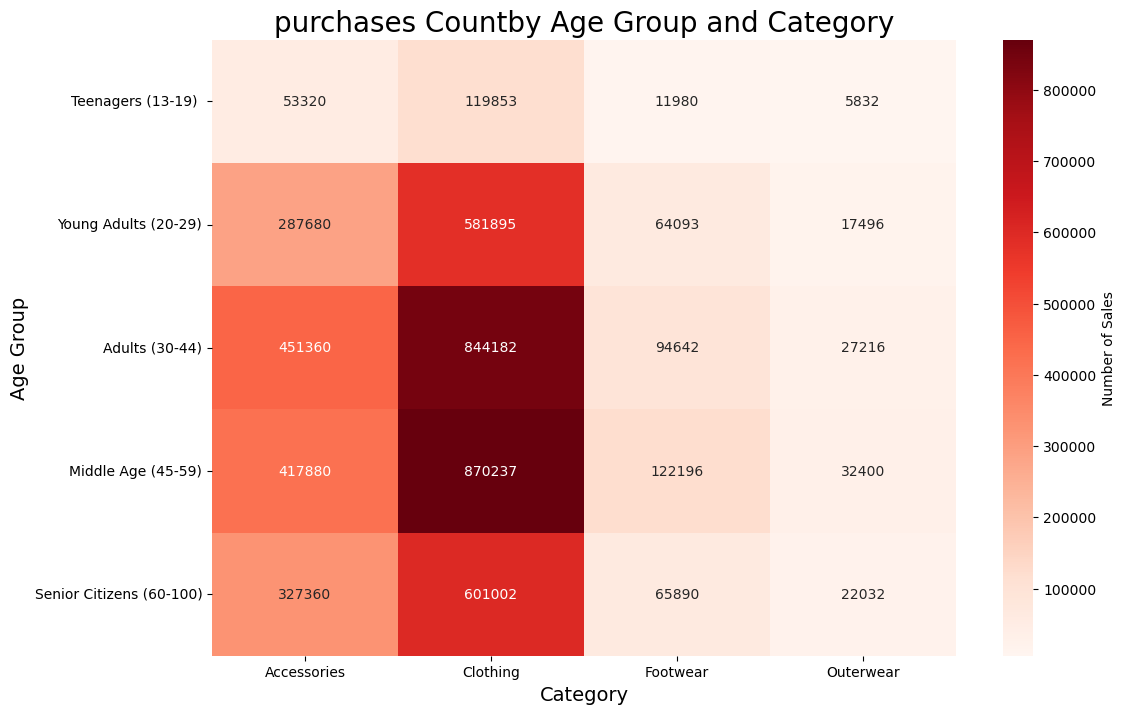

In [78]:
grouped_data = df.groupby(['Age Group', 'Category'])['purchases Count'].sum().unstack()
plt.figure(figsize=(12, 8))
sns.heatmap(grouped_data, annot=True, fmt='g', cmap= 'Reds', cbar_kws={'label': 'Number of Sales'})
plt.title('purchases Countby Age Group and Category', fontsize=20)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Age Group', fontsize=14)
plt.show()

# Drawing to link the type of payment by gender

<Figure size 2000x1000 with 0 Axes>

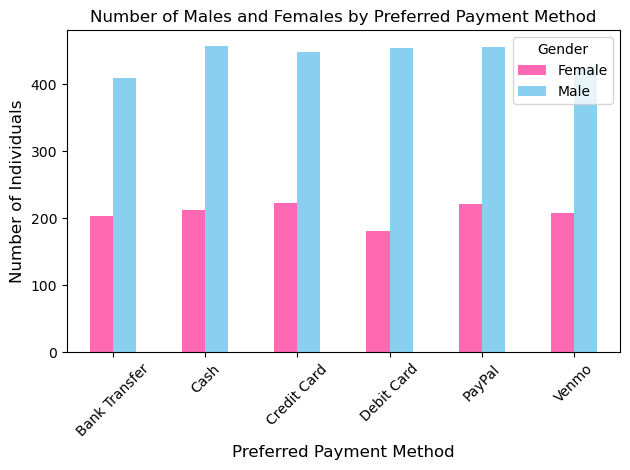

In [146]:
group_data = df.groupby([ 'Preferred Payment Method','Gender']).size().unstack(fill_value=0)
plt.figure(figsize=(20,10))
group_data.plot(kind='bar', stacked=False, color=['#FF69B4', '#89CFF0'])
plt.title('Number of Males and Females by Preferred Payment Method', fontsize=12)
plt.xlabel('Preferred Payment Method', fontsize=12)
plt.ylabel('Number of Individuals', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

# Purchases by Season

C:\Users\user\AppData\Local\Temp\ipykernel_5500\2491100050.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Season', palette= colors, order=data['Season'].value_counts().index)
C:\Users\user\AppData\Local\Temp\ipykernel_5500\2491100050.py:2: UserWarning: The palette list has more values (15) than needed (4), which may not be intended.
  sns.countplot(data=data, x='Season', palette= colors, order=data['Season'].value_counts().index)


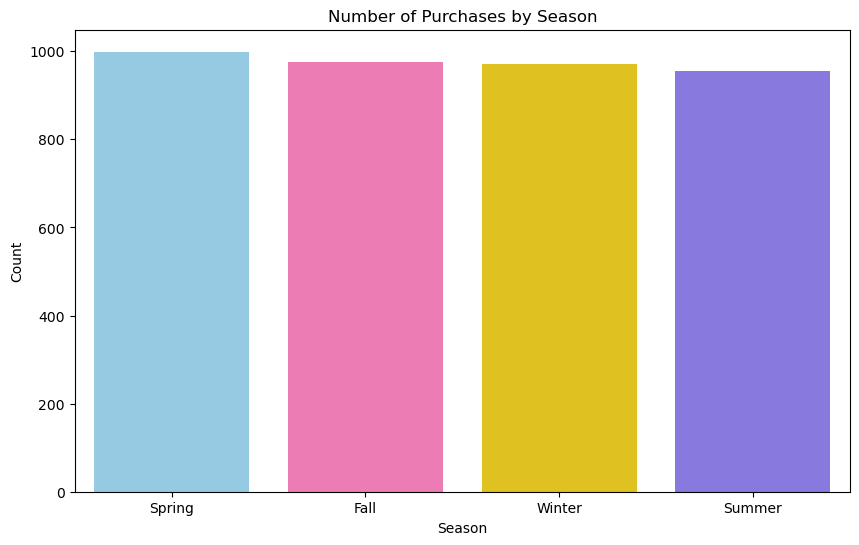

In [138]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Season', palette= colors, order=data['Season'].value_counts().index)
plt.title('Number of Purchases by Season')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()


 # Linking the type of purchases and  seasons



C:\Users\user\AppData\Local\Temp\ipykernel_5500\723238108.py:4: UserWarning: The palette list has more values (15) than needed (4), which may not be intended.
  g = sns.catplot(data=group_data1, x='Season', y='Count', hue='Category', kind='bar', height=6, aspect=2, palette=colors)


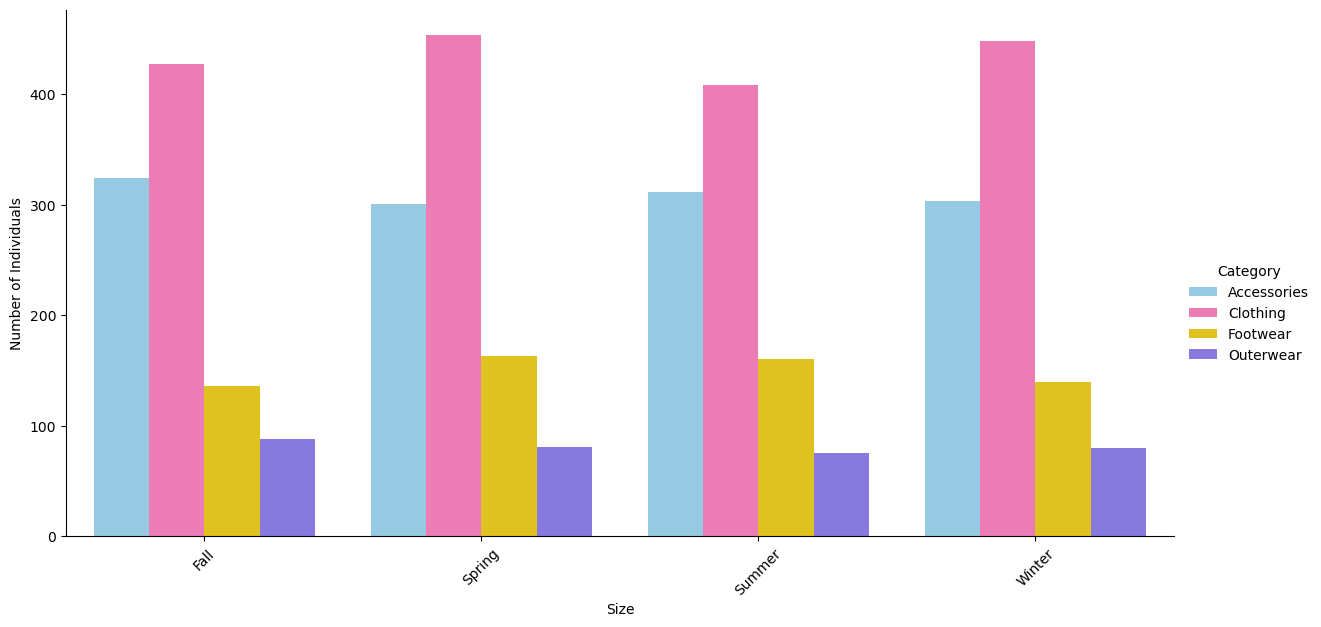

In [150]:
group_data1 = df.groupby(['Category', 'Season']).size().reset_index(name='Count')

# Creating a Facet Grid using Seaborn
g = sns.catplot(data=group_data1, x='Season', y='Count', hue='Category', kind='bar', height=6, aspect=2, palette=colors)

# Customizing titles and labels
g.set_axis_labels("Size", "Number of Individuals")
g.set_titles("Number of Category by Season")
plt.xticks(rotation=45)
plt.show()

# Link the highest purchases by seasons

   Item Purchased  Season  Count
40         Jacket    Fall     54
93        Sweater  Spring     52
54          Pants  Summer     50
91     Sunglasses  Winter     52


C:\Users\user\AppData\Local\Temp\ipykernel_5500\767012322.py:5: UserWarning: The palette list has more values (15) than needed (4), which may not be intended.
  sns.barplot(data=top_items, x='Season', y='Count', hue='Item Purchased', palette=colors)


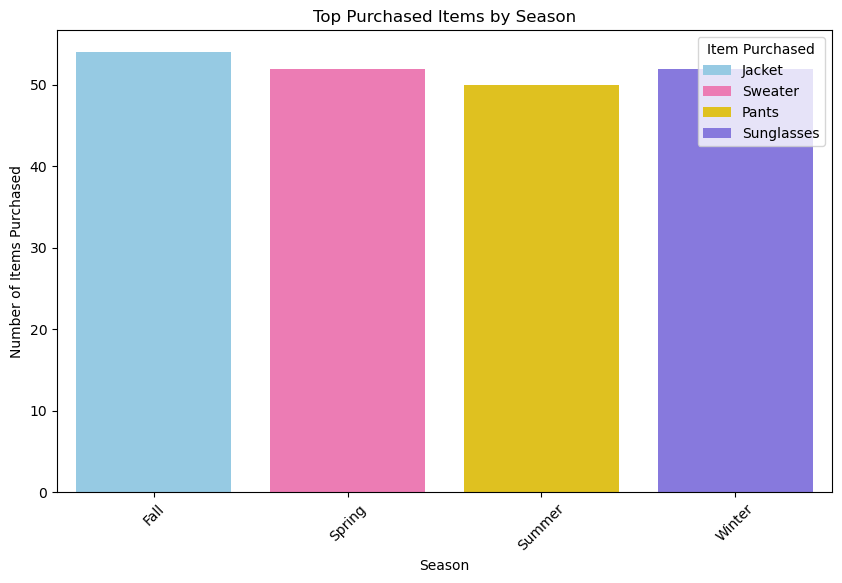

In [199]:
group_data = df.groupby(['Item Purchased', 'Season']).size().reset_index(name='Count')
top_items = group_data.loc[group_data.groupby('Season')['Count'].idxmax()]
print(top_items)
plt.figure(figsize=(10, 6))
sns.barplot(data=top_items, x='Season', y='Count', hue='Item Purchased', palette=colors)

plt.title("Top Purchased Items by Season")
plt.xlabel("Season")
plt.ylabel("Number of Items Purchased")
plt.xticks(rotation=45)
plt.legend(title='Item Purchased')
plt.show()

 # Link the  purchases in winter seasson




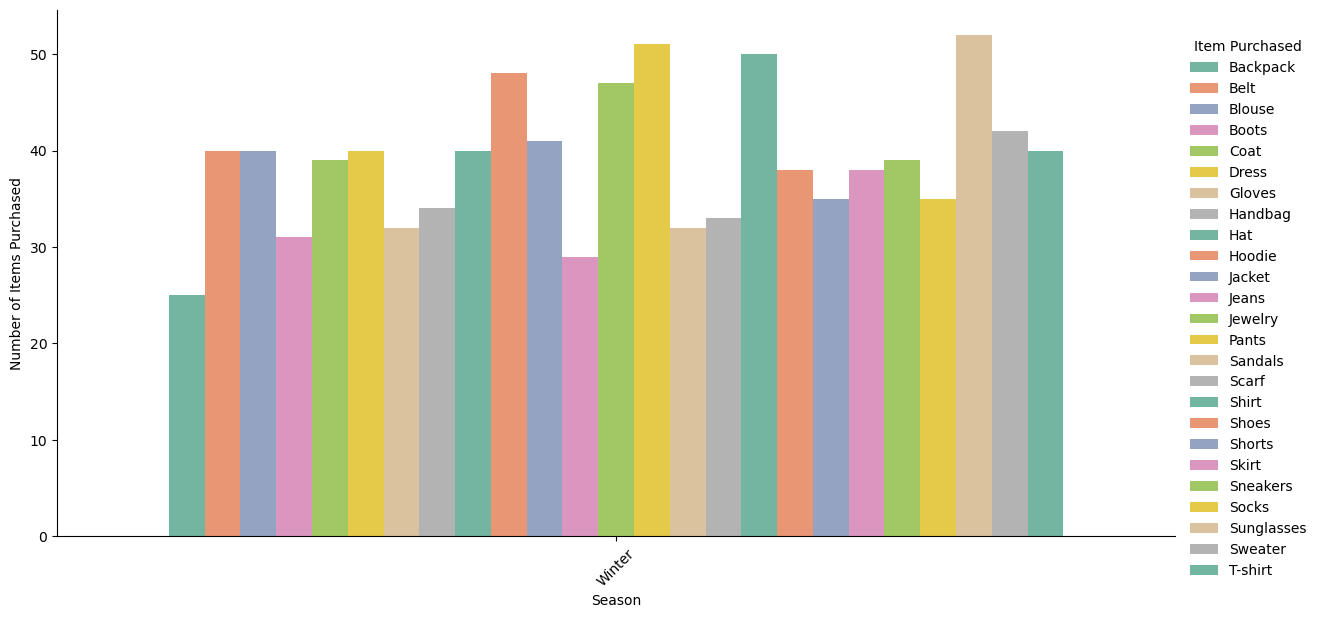

In [162]:
group_data1 = df.groupby(['Item Purchased', 'Season']).size().reset_index(name='Count')
winter_data = group_data1[group_data1['Season'] == 'Winter']

# Creating a Facet Grid using Seaborn
g = sns.catplot(data=winter_data, x='Season', y='Count', hue='Item Purchased', kind='bar', height=6, aspect=2, palette='Set2')

# Customizing titles and labels
g.set_axis_labels("Season", "Number of Items Purchased")
g.set_titles("Number of Items Purchased in Winter")
plt.xticks(rotation=45)
plt.show()

 #  Distribution of Purchase Frequency




C:\Users\user\AppData\Local\Temp\ipykernel_5500\870389281.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Frequency of Purchases', palette='muted', order=data['Frequency of Purchases'].value_counts().index)


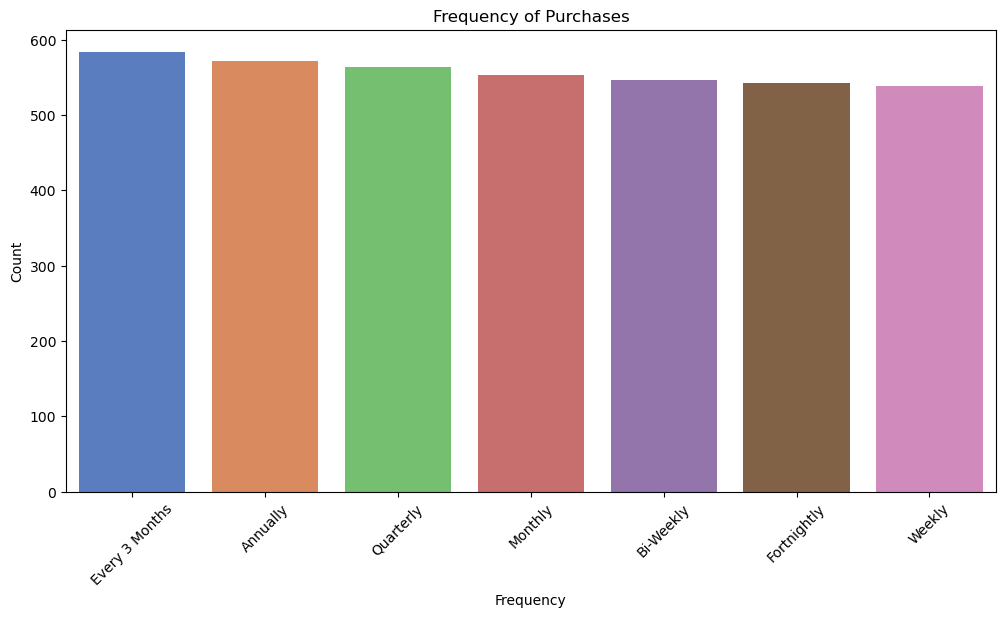

In [184]:
# Frequency of Purchases
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Frequency of Purchases', palette='muted', order=data['Frequency of Purchases'].value_counts().index)
plt.title('Frequency of Purchases')
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


# **Does the presence of a discount affect the purchase decision of customers??**

C:\Users\user\AppData\Local\Temp\ipykernel_5500\2243227515.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=group_data1, x='Discount Applied', y='Count' , palette='Set2')


<module 'matplotlib.pyplot' from 'C:\\Users\\user\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

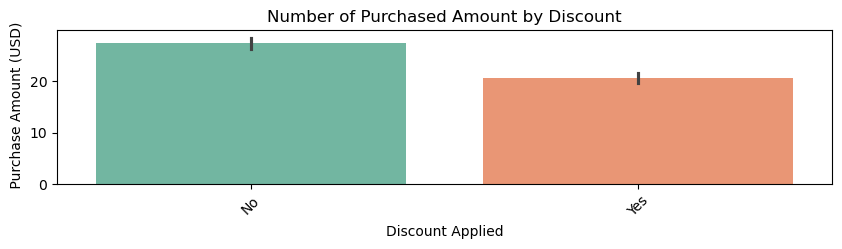

In [91]:
group_data1 = df.groupby(['Purchase Amount (USD)', 'Discount Applied']).size().reset_index(name='Count')
plt.figure(figsize=(10, 2))
sns.barplot(data=group_data1, x='Discount Applied', y='Count' , palette='Set2')
plt.title('Number of Purchased Amount by Discount')
plt.xlabel('Discount Applied')
plt.ylabel(' Purchase Amount (USD)')
plt.xticks(rotation=45)
plt

# **Are there any specific colors that are more popular among customers?**

C:\Users\user\AppData\Local\Temp\ipykernel_5500\2319928140.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Color', palette='muted', order=data['Color'].value_counts().index)


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24],
 [Text(0, 0, 'Olive'),
  Text(1, 0, 'Yellow'),
  Text(2, 0, 'Silver'),
  Text(3, 0, 'Teal'),
  Text(4, 0, 'Green'),
  Text(5, 0, 'Black'),
  Text(6, 0, 'Cyan'),
  Text(7, 0, 'Violet'),
  Text(8, 0, 'Gray'),
  Text(9, 0, 'Maroon'),
  Text(10, 0, 'Orange'),
  Text(11, 0, 'Charcoal'),
  Text(12, 0, 'Pink'),
  Text(13, 0, 'Magenta'),
  Text(14, 0, 'Blue'),
  Text(15, 0, 'Purple'),
  Text(16, 0, 'Peach'),
  Text(17, 0, 'Red'),
  Text(18, 0, 'Beige'),
  Text(19, 0, 'Indigo'),
  Text(20, 0, 'Lavender'),
  Text(21, 0, 'Turquoise'),
  Text(22, 0, 'White'),
  Text(23, 0, 'Brown'),
  Text(24, 0, 'Gold')])

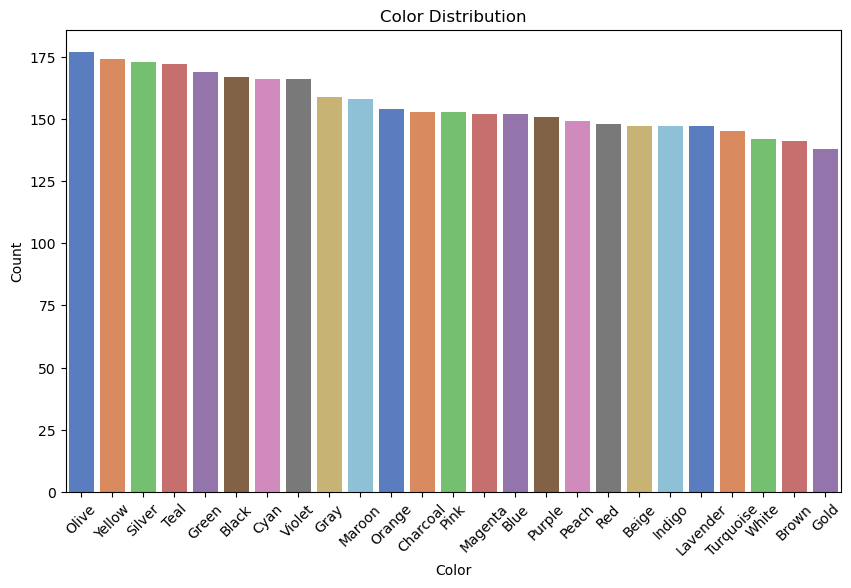

In [93]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Color', palette='muted', order=data['Color'].value_counts().index)
plt.title('Color Distribution')
plt.xlabel('Color')
plt.ylabel('Count')
plt.xticks(rotation=45)

# ** The average number of previous purchases made by customers **

In [96]:
data['Previous Purchases'].mean()

25.35153846153846

# Relationship between customer age and the category of products they purchase

      Category        Age
0  Accessories  44.224194
1     Clothing  43.782959
2     Footwear  44.442404
3    Outerwear  44.311728


C:\Users\user\AppData\Local\Temp\ipykernel_5500\1405874646.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data1, x='Category', y='Age', palette='viridis')


Text(0.5, 0, 'Category')

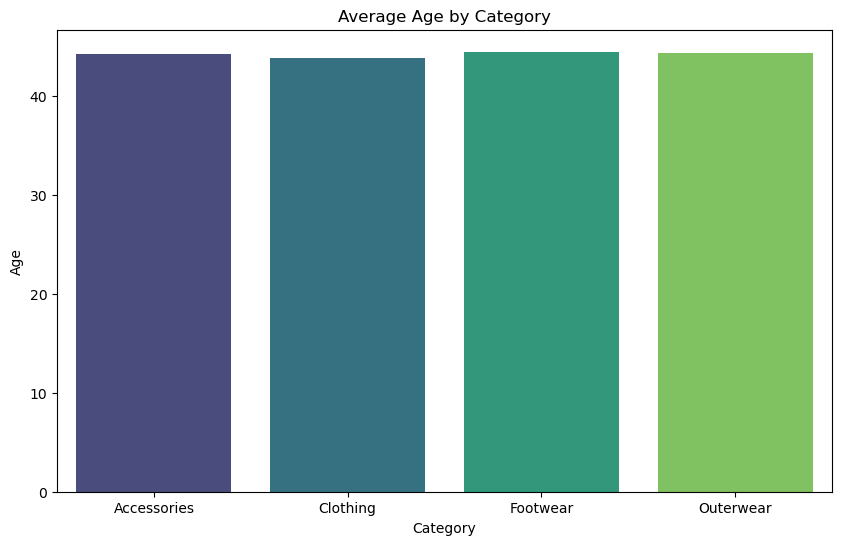

In [176]:
data1=data.groupby('Category')['Age'].mean().reset_index()
print(data1)
plt.figure(figsize=(10, 6))
sns.barplot(data=data1, x='Category', y='Age', palette='viridis')
plt.title('Average Age by Category')
plt.xlabel('Category')

      Category   Age
0  Accessories  1240
1     Clothing  1737
2     Footwear   599
3    Outerwear   324


C:\Users\user\AppData\Local\Temp\ipykernel_5500\1596830527.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data1, x='Category', y='Age', palette='viridis')


Text(0.5, 0, 'Category')

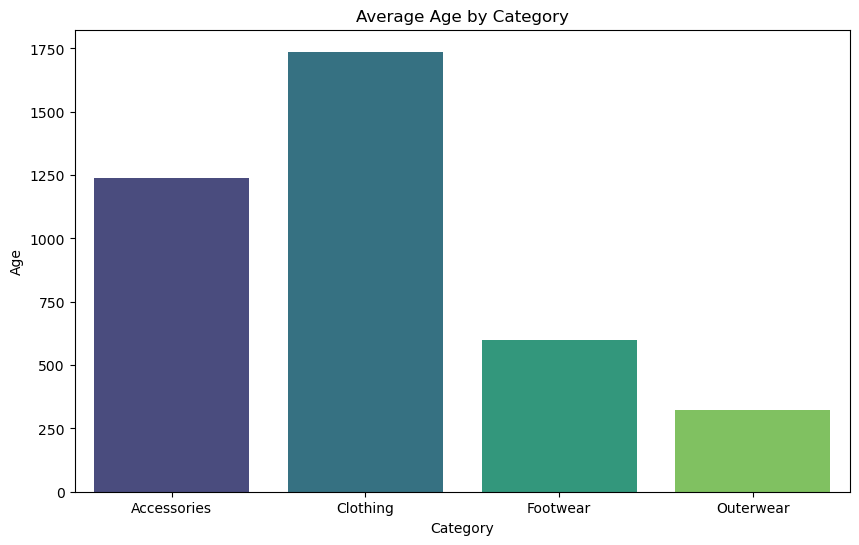

In [174]:
data1=data.groupby('Category')['Age'].size().reset_index()
print(data1)
plt.figure(figsize=(10, 6))
sns.barplot(data=data1, x='Category', y='Age', palette='viridis')
plt.title('Average Age by Category')
plt.xlabel('Category')